In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import seaborn as sns
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from os import system

In [2]:
database = pd.read_csv('bank.csv')
database.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
database.info()
#this gives us a general summary of the database

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
database.shape
# Number of rows and columns.

(45211, 17)

In [5]:
database.dtypes
# The datatypes of data in each column. Here we have integers and objects. We will be converting the objects to categorical
# variables and numerical values later on.

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [6]:
print(database.isnull().values.any())
print(database.isnull().sum())
# Here we confirm what we already saw in the previous line of code, that there are no missing values in the database.

False
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64


In [7]:
database.describe()
# 5-pt Summary of the numerical columns of the database.
#Presence of negetive values in balance column is seen here, which will be handeled below.
#Negetive one in pdays makes sense since it denote no previous contact.

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
numerical_database= database[['age','balance','day','duration','campaign','pdays','previous']]
print('The Outliers in the Data are:')

for j in numerical_database.columns:

    outliers=[]
    outliers_total=[]
    data=database[j]
    mean=data.mean()
    standard_deviation=data.std()
    cutoff=standard_deviation*3
    lower_limit=mean-cutoff
    upper_limit=mean+cutoff

    for i in data:
        if (i > upper_limit or i < lower_limit):
            outliers.append(i)
            
    outliers_total.append(len(outliers))
    print(outliers_total)

# From the 5 point summary above we can see that the data is heavily skewed, hence will contain a large number of 
# outliers as shown below. Looking at the table above we see that the min and the three quartiles remain the same
# while the max value is significantly higher. This shows that the data is largely skewed to the left and hence most 
#of the higher values will become outliers. However due to their large number these are necessary in our prediction models.
#This is further proven when we look at the frequency distributions below.

The Outliers in the Data are:
[381]
[745]
[0]
[963]
[840]
[1723]
[582]


In [9]:
neg_values = database[ database['balance'] <= 0 ].index
 
database.drop(neg_values , inplace=True)
database.shape

#From the 5 point summary we noticed the presence of negetive values in the balance column which is not feasible. 
#Since we have a large database we drop the rows with incorrect values (lesser than and equal to 0)

(37931, 17)

In [10]:
print(database.job.value_counts())
print(database.marital.value_counts())
print(database.education.value_counts())
print(database.default.value_counts())
print(database.housing.value_counts())
print(database.loan.value_counts())
print(database.contact.value_counts())
print(database.month.value_counts())
print(database.poutcome.value_counts())
print(database.Target.value_counts())

#Looking at the categories available for the categorical variable in our data

management       8053
blue-collar      8006
technician       6334
admin.           4312
services         3355
retired          1977
self-employed    1367
entrepreneur     1220
unemployed       1122
housemaid        1049
student           880
unknown           256
Name: job, dtype: int64
married     22737
single      11030
divorced     4164
Name: marital, dtype: int64
secondary    19171
tertiary     11455
primary       5707
unknown       1598
Name: education, dtype: int64
no     37672
yes      259
Name: default, dtype: int64
yes    20734
no     17197
Name: housing, dtype: int64
no     32456
yes     5475
Name: loan, dtype: int64
cellular     24751
unknown      10669
telephone     2511
Name: contact, dtype: int64
may    11282
aug     5280
jul     5264
jun     4534
nov     3496
apr     2641
feb     2350
jan     1228
oct      677
sep      532
mar      444
dec      203
Name: month, dtype: int64
unknown    30616
failure     4284
other       1602
success     1429
Name: poutcome, dtype: int64
n

In [11]:
for i in database.columns:
    if database[i].dtype == 'object': 
        database[i] = pd.Categorical(database[i])
        
replaceStruct = {
                "education": {"primary": 1, "secondary": 2 ,"tertiary": 3 ,"unknown":-1},
                "month": {"jan": 1,"feb":2 ,"mar": 3,"apr": 4,"may": 5,"jun": 6,
                          "jul":7 ,"aug": 8,"sep": 9,"oct": 10,"nov": 11,"dec":12},
                "phone":    {"no": 1, "yes": 2 },
                "default":  {"no": 0, "yes": 1 },
                "housing":  {"no": 0, "yes": 1 },
                "loan":     {"no": 0, "yes": 1 },
                "Target":   {"no": 0, "yes": 1 }
                }
oneHotCols=["job","marital","contact","poutcome"]

database=database.replace(replaceStruct)
database=pd.get_dummies(database, columns=oneHotCols)
database.head(10)

#Here we prepare our data by converting the categorical variables to numerical variables by encoding them. We perform
#binary encoding (one hot column) to the variables which have no hierarchy, while the others are encoded with integer values.

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,3,0,2143,1,0,5,5,261,1,...,0,1,0,0,0,1,0,0,0,1
1,44,2,0,29,1,0,5,5,151,1,...,0,0,1,0,0,1,0,0,0,1
2,33,2,0,2,1,1,5,5,76,1,...,0,1,0,0,0,1,0,0,0,1
3,47,-1,0,1506,1,0,5,5,92,1,...,0,1,0,0,0,1,0,0,0,1
4,33,-1,0,1,0,0,5,5,198,1,...,0,0,1,0,0,1,0,0,0,1
5,35,3,0,231,1,0,5,5,139,1,...,0,1,0,0,0,1,0,0,0,1
6,28,3,0,447,1,1,5,5,217,1,...,0,0,1,0,0,1,0,0,0,1
7,42,3,1,2,1,0,5,5,380,1,...,1,0,0,0,0,1,0,0,0,1
8,58,1,0,121,1,0,5,5,50,1,...,0,1,0,0,0,1,0,0,0,1
9,43,2,0,593,1,0,5,5,55,1,...,0,0,1,0,0,1,0,0,0,1


In [12]:
database.dtypes
# Here we can see that after the conversion performed above all our variables are of numerical type.

age                  int64
education            int64
default              int64
balance              int64
housing              int64
loan                 int64
day                  int64
month                int64
duration             int64
campaign             int64
pdays                int64
previous             int64
Target               int64
job_admin.           uint8
job_blue-collar      uint8
job_entrepreneur     uint8
job_housemaid        uint8
job_management       uint8
job_retired          uint8
job_self-employed    uint8
job_services         uint8
job_student          uint8
job_technician       uint8
job_unemployed       uint8
job_unknown          uint8
marital_divorced     uint8
marital_married      uint8
marital_single       uint8
contact_cellular     uint8
contact_telephone    uint8
contact_unknown      uint8
poutcome_failure     uint8
poutcome_other       uint8
poutcome_success     uint8
poutcome_unknown     uint8
dtype: object

In [13]:
x = database.drop(['Target','month','day','contact_cellular','contact_telephone','contact_unknown'],axis=1)
y = database[['Target']]
# x denotes our independent variables, while y signifies our dependent variable. Variable which dont offer anything 
# in terms of classification as seen from the correlation heatmap can be droped.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)
# Splitting the data into training and test set in the ratio of 70:30 respectively

Performance = pd.DataFrame(np.random.rand(9,4),index='Logistic_Regression, Naive_Bayes, KNN, SVM, Decision_Tree, Bagging_classifier, Ada_Boost, Gradient_Boost, Random_Forest'.split(),
                           columns='Training Testing Recall Precision'.split())
# Here we create a table to compare the performance of our different prediction models.

In [14]:
#Linear Regression
model = LinearRegression()
model.fit(x_train, y_train)

predict = model.predict(x_test)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

# Linear Regression is the simplest classification model, and as apparent doesnt work well here.
# Moving on to better Classification models,

0.2733113833198978
0.25860016499273064


In [15]:
#Logistic Regression
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train.values.ravel())

predict = model.predict(x_test)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

#performs significantly better than linear regression

0.893826974501902
0.8906854130052724


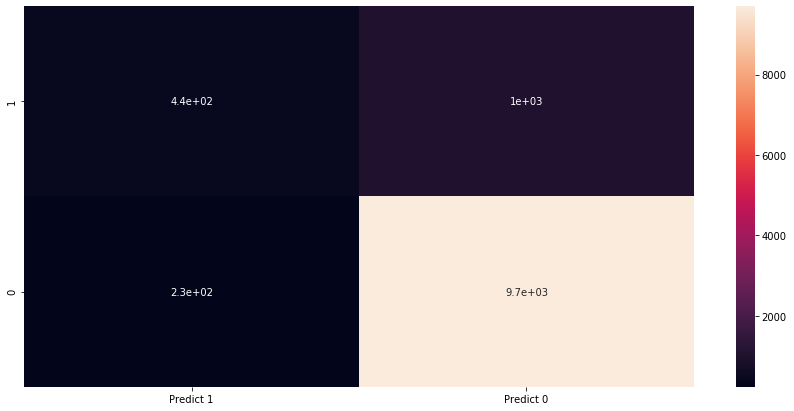

In [16]:
confusion_matrix = metrics.confusion_matrix(y_test, predict, labels=[1, 0])

cfm = pd.DataFrame(confusion_matrix, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (15,7))
sns.heatmap(cfm, annot=True)

Performance.iloc[0,:]=[model.score(x_train, y_train), model.score(x_test, y_test),
                       (cfm.iloc[0,0]/(cfm.iloc[0,0]+cfm.iloc[0,1])), (cfm.iloc[0,0]/(cfm.iloc[0,0]+cfm.iloc[1,0]))]

In [17]:
#Naive Bayes
model = GaussianNB()
model.fit(x_train, y_train.values.ravel())

predict = model.predict(x_test)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

#Gives the best true positive rate as seen in performance table towards the end.

0.8400436895032202
0.8390158172231986


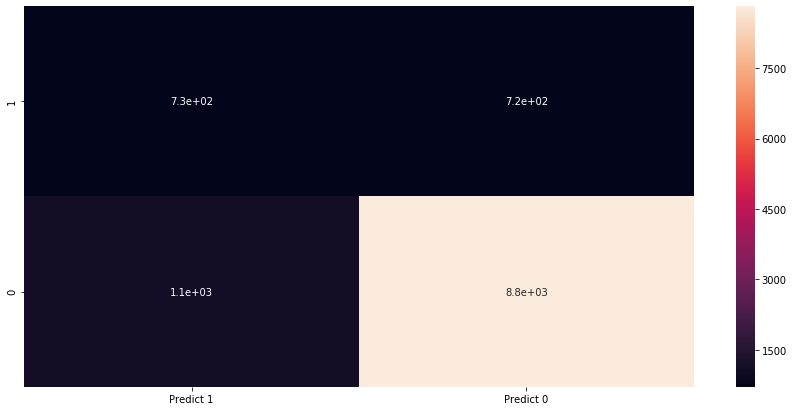

In [18]:
confusion_matrix = metrics.confusion_matrix(y_test, predict, labels=[1, 0])

cfm = pd.DataFrame(confusion_matrix, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (15,7))
sns.heatmap(cfm, annot=True)

Performance.iloc[1,:]=[model.score(x_train, y_train), model.score(x_test, y_test),
                       (cfm.iloc[0,0]/(cfm.iloc[0,0]+cfm.iloc[0,1])), (cfm.iloc[0,0]/(cfm.iloc[0,0]+cfm.iloc[1,0]))]

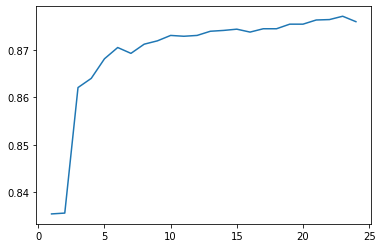

In [19]:
#K Nearest Neighbours
scores =[]
for k in range(1,25):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(x_train, y_train.values.ravel())
    scores.append(NNH.score(x_test, y_test))

plt.plot(range(1,25),scores)

# Calculating the optimal value of K

In [20]:
model = KNeighborsClassifier(n_neighbors= 16 , weights = 'distance' )
model.fit(x_train, y_train.values.ravel())

predict = model.predict(x_test)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))
# K value was chosen after performing a trail and error run of different K Values to find the lowest K value with best
# performance. How this was done is shown babove

1.0
0.873725834797891


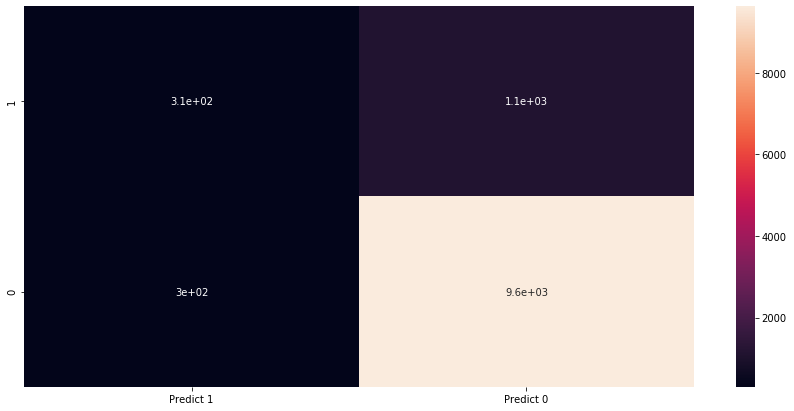

In [21]:
confusion_matrix = metrics.confusion_matrix(y_test, predict, labels=[1, 0])

cfm = pd.DataFrame(confusion_matrix, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (15,7))
sns.heatmap(cfm, annot=True)

Performance.iloc[2,:]=[model.score(x_train, y_train), model.score(x_test, y_test),
                       (cfm.iloc[0,0]/(cfm.iloc[0,0]+cfm.iloc[0,1])), (cfm.iloc[0,0]/(cfm.iloc[0,0]+cfm.iloc[1,0]))]

In [22]:
#Support Vector Machine
model = svm.SVC(gamma=0.025, C=3)
model.fit(x_train , y_train.values.ravel())

predict = model.predict(x_test)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))
# Value of Gamma and C must be chosen after trail and error method.
# Although it gives good accuracy, True positive rate is very poor. Refer performance table at the end.

0.9995480396218598
0.8669595782073813


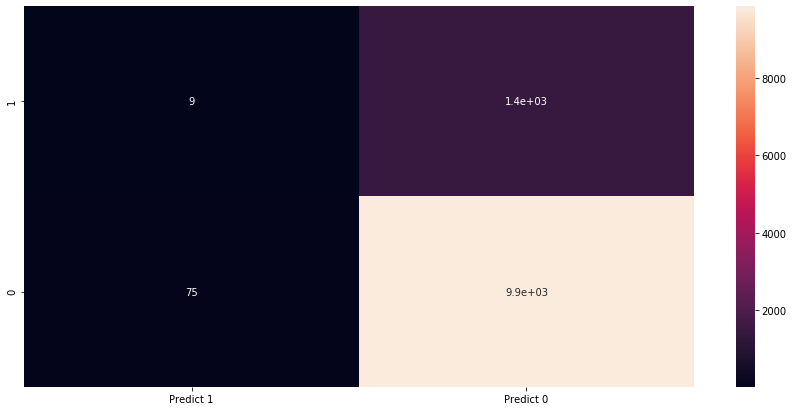

In [23]:
confusion_matrix = metrics.confusion_matrix(y_test, predict, labels=[1, 0])

cfm = pd.DataFrame(confusion_matrix, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (15,7))
sns.heatmap(cfm, annot=True)

Performance.iloc[3,:]=[model.score(x_train, y_train), model.score(x_test, y_test),
                       (cfm.iloc[0,0]/(cfm.iloc[0,0]+cfm.iloc[0,1])), (cfm.iloc[0,0]/(cfm.iloc[0,0]+cfm.iloc[1,0]))]

In [24]:
#Decision Tree
model = DecisionTreeClassifier(criterion = 'gini', random_state=1)
model.fit(x_train, y_train.values.ravel())

predict = model.predict(x_test)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

# Here we use gini criteria to perform spliting. From the result we notice that overfitting has occured as training 
# accuracy is 1.Lets try to improve testing accuracy by performing regularization as shown below.

1.0
0.840158172231986


In [25]:
model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
model.fit(x_train, y_train.values.ravel())

predict = model.predict(x_test)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

#to reduce overfitting seen in prior model we will set a max value to limit deapth, i.e. the max number of nodes/branches
#allowed. This will take care of over-fitting and improve test accuracy in exchange for training accuracy.

0.8955594892847727
0.8928822495606327


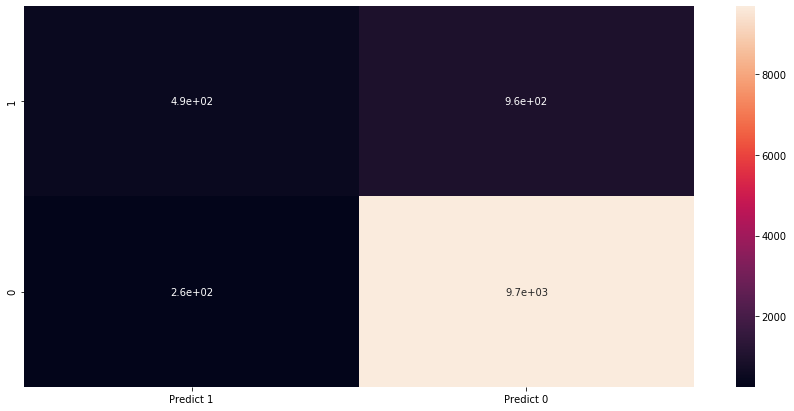

In [26]:
confusion_matrix = metrics.confusion_matrix(y_test, predict, labels=[1, 0])

cfm = pd.DataFrame(confusion_matrix, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (15,7))
sns.heatmap(cfm, annot=True)

Performance.iloc[4,:]=[model.score(x_train, y_train), model.score(x_test, y_test),
                       (cfm.iloc[0,0]/(cfm.iloc[0,0]+cfm.iloc[0,1])), (cfm.iloc[0,0]/(cfm.iloc[0,0]+cfm.iloc[1,0]))]

In [27]:
#Bagging
model = BaggingClassifier(n_estimators=50,random_state=1)
model.fit(x_train, y_train.values.ravel())

predict = model.predict(x_test)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

#the problem of overfitting seen in decision tree is taken care of.Can vary number of estimators.We are choosing the 
#default base estimator as it performs best(after trial and error)

0.9994727128921698
0.8859402460456942


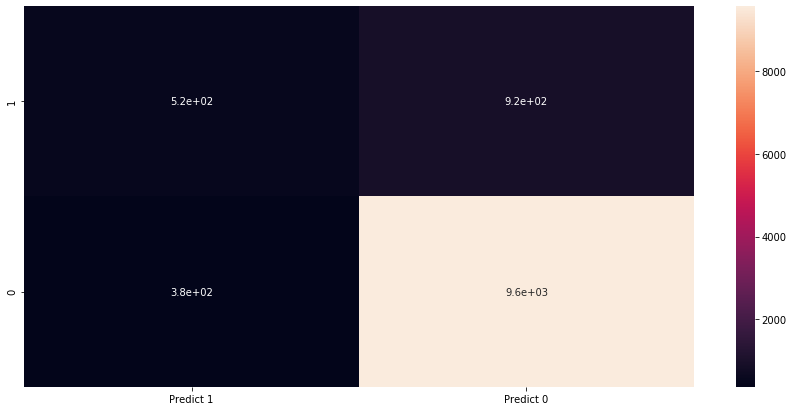

In [28]:
confusion_matrix = metrics.confusion_matrix(y_test, predict, labels=[1, 0])

cfm = pd.DataFrame(confusion_matrix, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (15,7))
sns.heatmap(cfm, annot=True)

Performance.iloc[5,:]=[model.score(x_train, y_train), model.score(x_test, y_test),
                       (cfm.iloc[0,0]/(cfm.iloc[0,0]+cfm.iloc[0,1])), (cfm.iloc[0,0]/(cfm.iloc[0,0]+cfm.iloc[1,0]))]

In [29]:
#Ada Boosting
model = AdaBoostClassifier(n_estimators=50, random_state=1)
model.fit(x_train, y_train.values.ravel())

predict = model.predict(x_test)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))


0.8928853903807766
0.8892794376098418


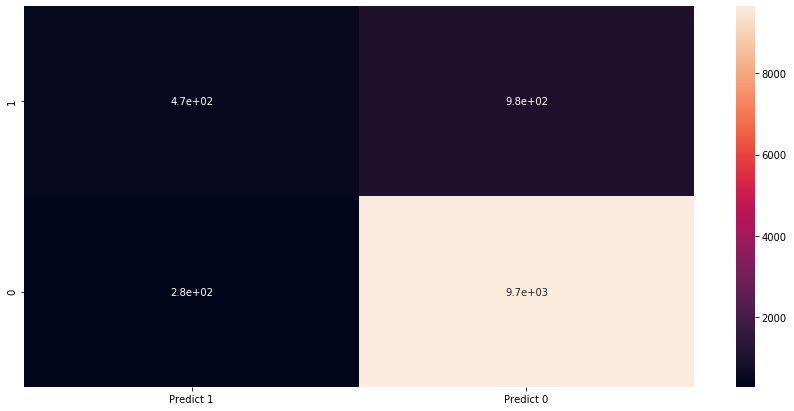

In [30]:
confusion_matrix = metrics.confusion_matrix(y_test, predict, labels=[1, 0])

cfm = pd.DataFrame(confusion_matrix, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (15,7))
sns.heatmap(cfm, annot=True)

Performance.iloc[6,:]=[model.score(x_train, y_train), model.score(x_test, y_test),
                       (cfm.iloc[0,0]/(cfm.iloc[0,0]+cfm.iloc[0,1])), (cfm.iloc[0,0]/(cfm.iloc[0,0]+cfm.iloc[1,0]))]

In [31]:
#Gradient Boosting
model = GradientBoostingClassifier(n_estimators = 50,random_state=1)
model.fit(x_train, y_train.values.ravel())

predict = model.predict(x_test)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.898949192120824
0.8942003514938489


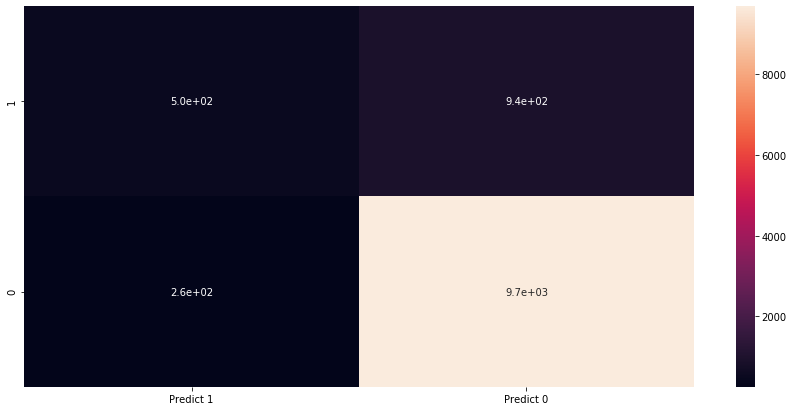

In [32]:
confusion_matrix = metrics.confusion_matrix(y_test, predict, labels=[1, 0])

cfm = pd.DataFrame(confusion_matrix, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (15,7))
sns.heatmap(cfm, annot=True)

Performance.iloc[7,:]=[model.score(x_train, y_train), model.score(x_test, y_test),
                       (cfm.iloc[0,0]/(cfm.iloc[0,0]+cfm.iloc[0,1])), (cfm.iloc[0,0]/(cfm.iloc[0,0]+cfm.iloc[1,0]))]

In [33]:
#Random Forest
model = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
model.fit(x_train, y_train.values.ravel())

predict = model.predict(x_test)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

#THis can only be done using decision trees. Number of differnt models can be varied.

0.9994727128921698
0.8894551845342706


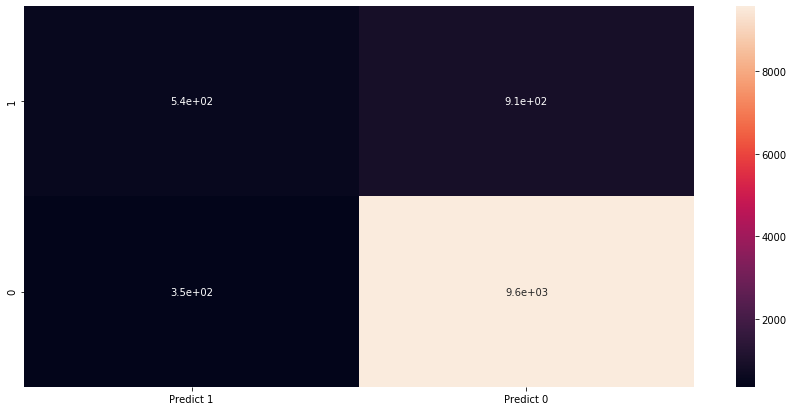

In [34]:
confusion_matrix = metrics.confusion_matrix(y_test, predict, labels=[1, 0])

cfm = pd.DataFrame(confusion_matrix, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (15,7))
sns.heatmap(cfm, annot=True)

Performance.iloc[8,:]=[model.score(x_train, y_train), model.score(x_test, y_test),
                       (cfm.iloc[0,0]/(cfm.iloc[0,0]+cfm.iloc[0,1])), (cfm.iloc[0,0]/(cfm.iloc[0,0]+cfm.iloc[1,0]))]

#### Comparing Models & Conclusion

In [35]:
Performance.head(10)

,Training,Testing,Recall,Precision
"Logistic_Regression,",0.893827,0.890685,0.301796,0.652239
"Naive_Bayes,",0.840044,0.839016,0.506215,0.396216
"KNN,",1.000000,0.873726,0.216160,0.508943
"SVM,",0.999548,0.866960,0.006215,0.107143
"Decision_Tree,",0.895559,0.892882,0.335635,0.654105
"Bagging_classifier,",0.999473,0.885940,0.362569,0.583333
"Ada_Boost,",0.892885,0.889279,0.323204,0.625668
"Gradient_Boost,",0.898949,0.894200,0.348757,0.659269
Random_Forest,0.999473,0.889455,0.372928,0.606742


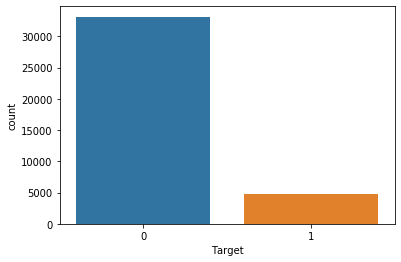

In [36]:
sns.countplot(database['Target'])
# Our objective is to identify as many elements as possible from the 'yes' column.

##### Now looking at the performance measures of different classification models what conclusions can we draw. First we must note that in our classification problem, our top priority is to identify as many customers as possible that are amenable towards the marketing campaign. This is given by the 'recall' performance measure, which calculates how many of the total number of amenable clients did we correctly predict. This is our primary performance measure since the objective of this classification problems is to identify customers who are applicable to the marketing campaign.
##### Looking at the table above, Naive bayes performs the best in terms of correctly identifying as many potential clients as possible closely followed by Bagging Classifier and Random Forest Classifier. Next the precision parameter is used to minimize the number of false posetives, Here Naive bayes performs poorly in comparision to other classifiers. The overall accuracy of naive Bayes classifier too is less compared to the other classifier. Despite this, it is the prefered classifier for our classification problem as it identifies the most number of potential clients correctly.
##### An import observation to be made here is the performance of SVM classifier. Although it overall performance/accuracy is as good as the other classifiers when looking at its recall and precision values we realize how poorly it performs.
##### The Ensemble classifiers perform as well as the base classifiers in terms of accuracy and better than them when we consider the recall parameter. With the slight exception of Naive Bayes the ensemble classifiers perform better than the base classifiers. Bagging classifer and Random Forest are the best.